# Fastcat Demo

In [1]:
%pylab nbagg

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastcat as fc

# Initialize the spectrum (Spekpy)

In [3]:
s = fc.Spekpy(120,12)

<IPython.core.display.Javascript object>


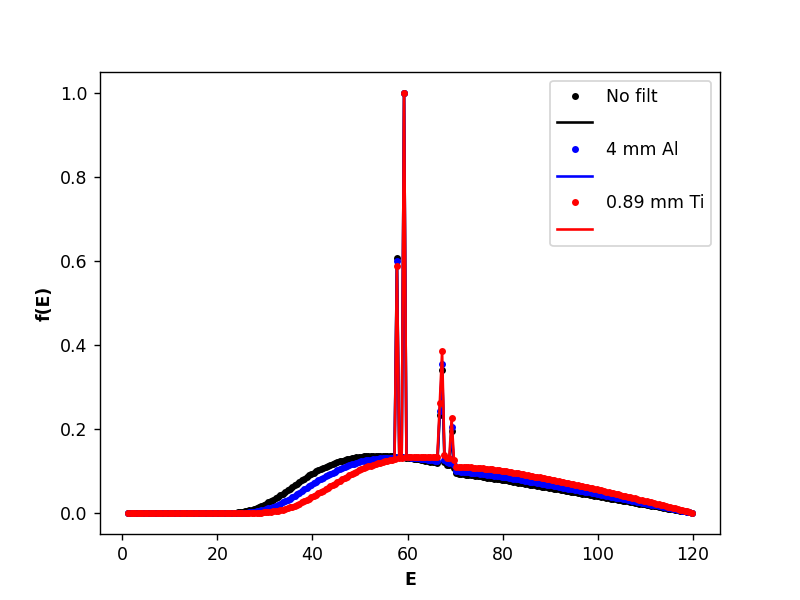

In [5]:
plt.figure()
fig = plt.subplot()
s.get_plot(fig,c='k')
s.attenuate(0.4,fc.get_mu(z=13)) # Aluminum inherent filtration
s.get_plot(fig)
s.attenuate(0.089,fc.get_mu(z=22)) # Titanium beam hardening filter
s.get_plot(fig,c='r')
plt.legend(['No filt',None,'4 mm Al',None,'0.89 mm Ti',None])

In [6]:
print(s)


Fastcat Spectrum Object
------------------------

    kV:          120 kVp
    Anode Angle: 12 deg

    From file:   False
    File location:     None
        


# Initialize the spectrum (MV Spectra)

#### List the MV spectra

In [7]:
fc.list_spectra_files()


AVAILABLE Saved SPECTRA (for fc.Spectrum.load('SPECTRA'):
Can also use an analytical spectra

Al_spectrum_25
Al_spectrum_6
C_spectrum_25
C_spectrum_6
Varian_truebeam
Varian_truebeam_phasespace
W_spectrum_25
W_spectrum_6
spectrum_120kVp_2mmAl


# Initialize the spectrum

<IPython.core.display.Javascript object>


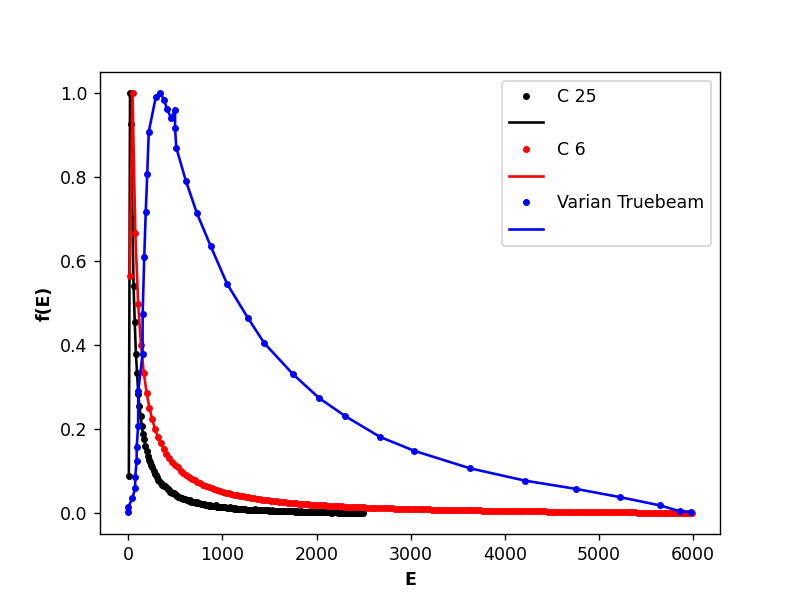

In [8]:
s = fc.Spectrum()
plt.figure()
s.load('C_spectrum_25')
fig = plt.subplot()
s.get_plot(fig,c='k')
s = fc.Spectrum()
s.load('C_spectrum_6')
fig = plt.subplot()
s.get_plot(fig,c='r')
s = fc.Spectrum()
s.load('Varian_truebeam')
fig = plt.subplot()
s.get_plot(fig,c='b')
plt.legend(['C 25',None,'C 6',None,'Varian Truebeam',None])

In [9]:
print(s)


Fastcat Spectrum Object
------------------------

    kV:          None
    Anode Angle: None

    From file:   True
    File location:     Varian_truebeam
        


# Initialize the detector

#### List the detectors

In [10]:
fc.list_detectors()


AVAILABLE DETECTORS (for fc.detector(s,'DETECTOR')):

CWO-261-micrometer
CWO-392-micro_thin
CWO-392-micrometer
CWO-784-micrometer
CZT-330-micrometer
CZT-342-micrometer
CsI-010-micrometer
CsI-100-micrometer
CsI-150-micrometer
CsI-336-micrometer
CsI-392-micrometer
CsI-784-micro_thin
CsI-784-micrometer
CuGOS-336-micrometer
CuGOS-392-micrometer
CuGOS-784-micrometer


<IPython.core.display.Javascript object>


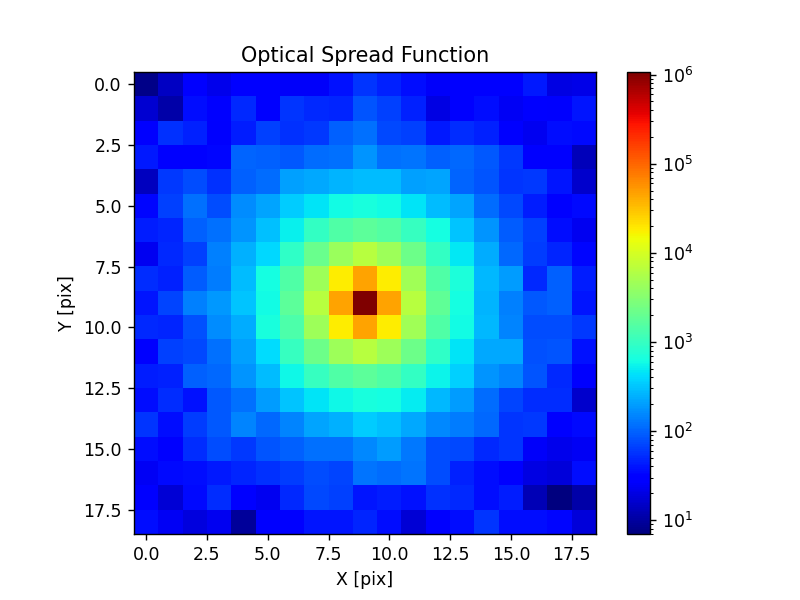

[2023-11-15 10:00:45,179] {colorbar.py:859} DEBUG - locator: <matplotlib.ticker.LogLocator object at 0x7f95b73a4c10>


In [12]:
det = fc.Detector(s,'CsI-784-micrometer')
# fig = plt.figure()
# im = det.get_plot(plt.subplot())
# fig.colorbar(im,ax = plt.gca())
# det.add_focal_spot(0.3)

plt.figure()
im = det.get_plot(plt.subplot())
fig.colorbar(im,ax = plt.gca())
# plt.xlim([0,18])
# plt.ylim([0,18])

In [13]:
print(det)


Fastcat Detector Object
------------------------

    Detector:    CsI-784-micrometer
    Pitch:       0.784
    Focal spot:  None

    Parameter files at:
    /home/jericho/Software/fastcat/fastcat/data/Detectors/CsI-784-micrometer/
        


# Initialize the phantom

#### Catphan_404

In [14]:
phantom = fc.Catphan_404()

<IPython.core.display.Javascript object>


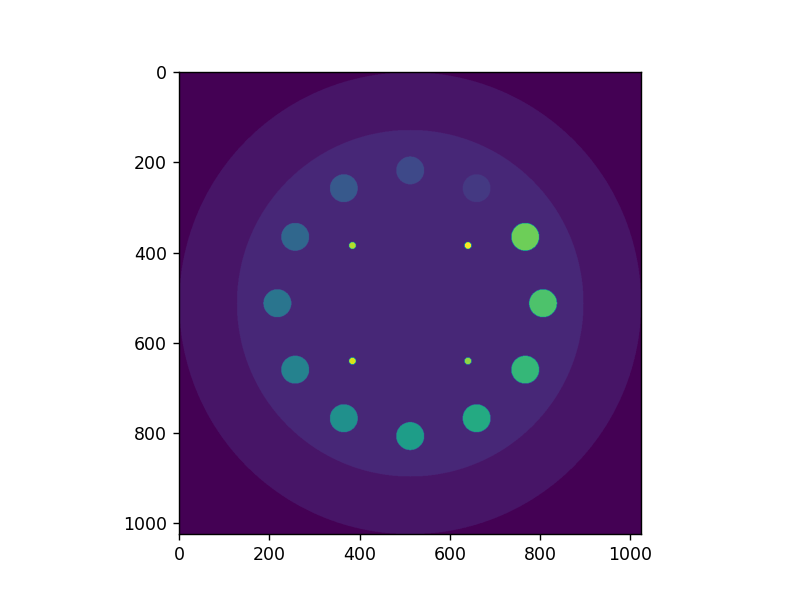

In [15]:
plt.figure()
plt.imshow(phantom.phantom[5])

In [13]:
phantom.phan_map

['air',
 'G4_POLYSTYRENE',
 'G4_POLYVINYL_BUTYRAL',
 'G4_POLYVINYL_BUTYRAL',
 'CATPHAN_Delrin',
 'G4_POLYVINYL_BUTYRAL',
 'CATPHAN_Teflon_revised',
 'air',
 'CATPHAN_PMP',
 'G4_POLYVINYL_BUTYRAL',
 'CATPHAN_LDPE',
 'G4_POLYVINYL_BUTYRAL',
 'CATPHAN_Polystyrene',
 'air',
 'CATPHAN_Acrylic',
 'air',
 'CATPHAN_Teflon',
 'air',
 'air',
 'air',
 'air']

In [16]:
print(phantom.geomet)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1500 mm
Distance from source to origin (DSO)= 1000 mm
-----
Detector parameters
Number of pixels (nDetector) = [ 64 512]
Size of each pixel (dDetector) = [0.784 0.784] mm
Total size of the detector (sDetector) = [ 50.176 401.408] mm
-----
Image parameters
Number of voxels (nVoxel) = [  10 1024 1024]
Total size of the image (sVoxel) = [160 200 200] mm
Size of each voxel (dVoxel) = [16.         0.1953125  0.1953125] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5
-----
Rotation of the Detector (rotDetector) = [0 0 0] rad


# Run the simulation

#### List available materials

In [16]:
fc.list_materials()


AVAILABLE MATERIALS (for fc.Phantom.phan_map = ['MATERIAL']:
Integers are atomic numbers

1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
6
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
8
80
81
82
83
84
86
88
89
9
90
91
92
ADIPOSE_TISSUE_ICRP
Adipose
Air
BLADDER_ICRP
BREAST_GLANDULAR_ICRU
Brain
Breast
C4_Vertebra_ICRP
CARTILAGE_ICRP
CATPHAN_Acrylic
CATPHAN_B20
CATPHAN_B50
CATPHAN_Delrin
CATPHAN_Delrin_revised
CATPHAN_LDPE
CATPHAN_PMP
CATPHAN_Polystyrene
CATPHAN_Teflon
CATPHAN_Teflon_206
CATPHAN_Teflon_revised
CB2-30
CsI
D6_Vertebra_ICRP
G4_1,2-DICHLOROBENZENE
G4_1,2-DICHLOROETHANE
G4_A-150_TISSUE
G4_ACETONE
G4_ACETYLENE
G4_ADIPOSE_TISSUE_ICRP
G4_ADIPOSE_TISSUE_ICRP2
G4_AIR
G4_ALANINE
G4_ALUMINUM_OXIDE
G4_AMBER
G4_AMMONIA
G4_ANILINE
G4_ANTHRACENE
G4_B-100_BONE
G4_BAKELITE
G4_BARIUM_FLUORIDE
G4_BARIUM_SULFATE
G4_BENZENE
G4_BERYLLIUM_OXIDE
G4_BGO
G4_BLOOD_ICRP
G

In [18]:
# Angles
angles = np.linspace(0,np.pi*2,180,endpoint=False)        

phantom.return_projs(det,s,angles,mgy = 8, ASG=True,scat_on=False,det_on=False,bowtie=True, filter='bowtie_real', load_proj=True, proj_file='xcat_phan_mandible_180_no_amalgam')

phantom.reconstruct('FDK',filt='ram_lak')

[2023-11-15 10:56:05,758] {simulate.py:221} INFO - Initializing filter bowtie_real
[2023-11-15 10:56:05,765] {simulate.py:397} INFO -    Scatter is modified by bowtie
[2023-11-15 10:56:05,766] {simulate.py:429} INFO - Initializing ASG
[2023-11-15 10:56:05,767] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-15 10:56:05,768] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-15 10:56:05,958] {simulate.py:579} INFO - Running Simulations
[2023-11-15 10:56:05,959] {simulate.py:606} INFO -     Simulating 10 keV
[2023-11-15 10:56:07,025] {simulate.py:606} INFO -     Simulating 20 keV
[2023-11-15 10:56:07,970] {simulate.py:606} INFO -     Simulating 30 keV
[2023-11-15 10:56:08,968] {simulate.py:606} INFO -     Simulating 40 keV
[2023-11-15 10:56:09,997] {simulate.py:606} INFO -     Simulating 50 keV
[2023-11-15 10:56:11,105] {simulate.py:606} INFO -     Simulating 60 keV
[2023-11-15 10:56:12,249] {simulate.py:606} INFO -     Simulating 70 keV
[2023-1

<IPython.core.display.Javascript object>


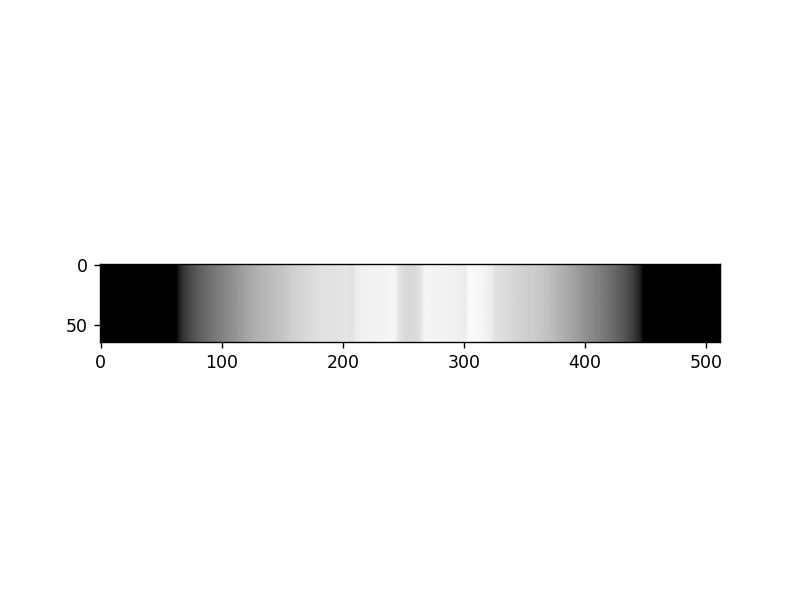

In [19]:
plt.figure()
plt.imshow(phantom.proj[90],cmap='gray')

# Reconstruct

<IPython.core.display.Javascript object>


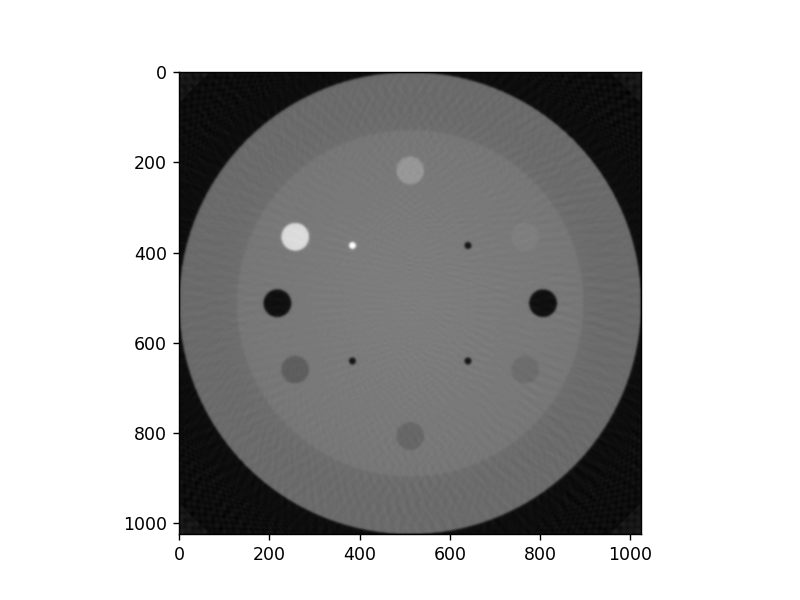

In [23]:
phantom.reconstruct('FDK',filt='hamming')

plt.figure()
plt.imshow(phantom.img[5],cmap='gray')

## Without bowtie and ASG 

In [28]:
kernel = fc.Detector(s, 'CsI-100-micrometer')
kernel.add_focal_spot(0.15)

# Angles
angles = np.linspace(0,np.pi*2,180,endpoint=False)        

phantom.return_projs(kernel,s,angles,mgy = 8)

phantom.reconstruct('FDK',filt='ram_lak')

[2023-11-15 10:57:52,491] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-15 10:57:52,491] {simulate.py:476} INFO -     Interp scatter 512 to 512 pixels
[2023-11-15 10:57:52,717] {simulate.py:579} INFO - Running Simulations
[2023-11-15 10:57:52,718] {simulate.py:582} INFO -     0.15 mm focal spot added
[2023-11-15 10:57:52,718] {simulate.py:606} INFO -     Simulating 10 keV
[2023-11-15 10:57:54,059] {simulate.py:606} INFO -     Simulating 20 keV
[2023-11-15 10:57:55,320] {simulate.py:606} INFO -     Simulating 30 keV
[2023-11-15 10:57:56,692] {simulate.py:606} INFO -     Simulating 40 keV
[2023-11-15 10:57:58,134] {simulate.py:606} INFO -     Simulating 50 keV
[2023-11-15 10:57:59,559] {simulate.py:606} INFO -     Simulating 60 keV
[2023-11-15 10:58:00,934] {simulate.py:606} INFO -     Simulating 70 keV
[2023-11-15 10:58:02,333] {simulate.py:606} INFO -     Simulating 80 keV
[2023-11-15 10:58:03,625] {simulate.py:821} INFO - Weighting simulations
[2023-11-15 10:5

<IPython.core.display.Javascript object>


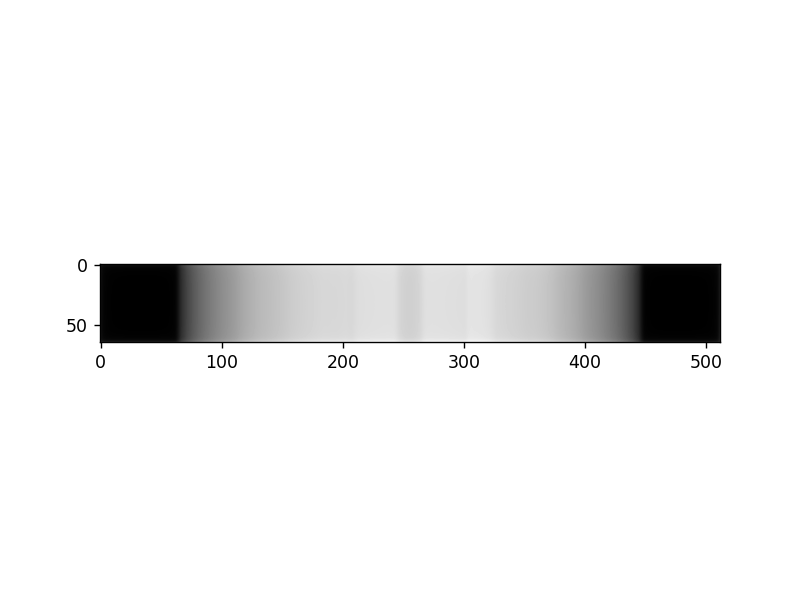

In [25]:
plt.figure()
plt.imshow(phantom.proj[90],cmap='gray')

<IPython.core.display.Javascript object>


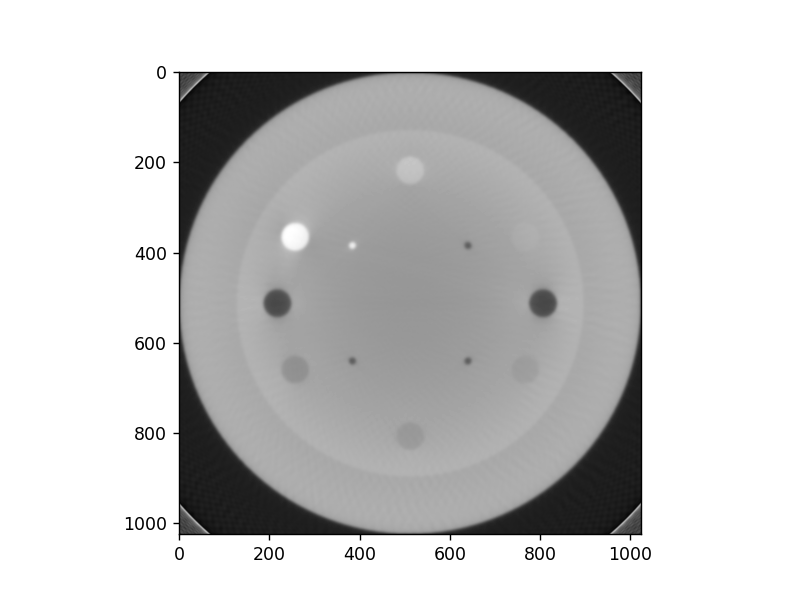

In [27]:
plt.figure()
plt.imshow(phantom.img[5],cmap='gray')